In [2]:
#Lets first import all the nessessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)
warnings.filterwarnings(action="ignore",category=DeprecationWarning)

pd.pandas.set_option("display.max_rows",None)
pd.pandas.set_option("display.max_columns",None)

In [3]:
#Lets read the data in
df1=pd.read_csv ("LT_processed_data.csv")

In [4]:
df1.head()

,NewDCFlag,NewRegionFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsMainstream,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,ProjectCategory,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
0,True,False,missing,missing,Azure,Compute,missing,False,Not Mainstream,False,Asia Pacific,Growth,20,800.0,99-ZZ No Priority,Azure Compute APAC,PRD,Southeast Asia,Not Restricted,Hero,0,PreRack,124.0,31.0
1,False,False,missing,missing,Azure,Storage,missing,False,Not Mainstream,False,Asia Pacific,Growth,20,280.0,99-ZZ No Priority,Azure Storage APAC,PRD,Southeast Asia,Not Restricted,Hero,0,PreRack,126.0,42.0
2,True,False,missing,missing,Azure,Compute,missing,False,Not Mainstream,False,Europe,Growth,20,800.0,99-ZZ No Priority,Azure Compute EMEA,PRD,West Europe,Not Restricted,Hero,0,PreRack,198.0,31.0
3,False,False,missing,missing,Azure,XIO Compute,missing,False,Not Mainstream,False,United States,Growth,20,880.0,99-ZZ No Priority,Azure Compute US,PRD,West US,Not Restricted,Hub,0,PreRack,207.0,49.0
4,False,False,missing,missing,Azure,Xtransport,missing,False,Not Mainstream,False,CHINA,Growth,1,14.0,99-ZZ No Priority,Rare_var,PRD,Rare_var,Restricted,Satellite,0,PreRack,737.0,49.0


In [5]:
#As per the observations in EDA, we are going to drop-IsMainstream,ProjectCategory,NewRegionFlag, since it contains a single catogory
df1.drop(["NewRegionFlag","IsMainstream","ProjectCategory"],axis=1,inplace=True)

In [6]:
#Since we already dealt with EDA and Feature Engineering, we will just check the summary
#Fuction to see the summary of the data
def summary_table(df):
    print(f"Dataset Shape: {df.shape}")
    #print("Total Columns in the Dataset:", df1.columns.nunique())
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing Values'] = df.isnull().sum().values
    summary['Uniques Values'] = df.nunique().values
  
    return summary

In [7]:
summary_table(df1)

Dataset Shape: (1124, 21)


,Name,dtypes,Missing Values,Uniques Values
0,NewDCFlag,bool,0,2
1,ColoReady At PlanReservationStart Flag,object,0,3
2,DeploymentSeverity,object,0,4
3,EngineeringGroup,object,0,6
4,PlanResourceTypeName,object,0,31
5,IsAddRack,object,0,3
6,IsFirstFootprint,bool,0,2
7,IsNPI,bool,0,2
8,PlanGEO,object,0,14
9,PlanIntentName,object,0,7


In [8]:
#Lets fix the datatypes of each feature (Convert Bool type as Object type)
bool_features_list= [feature for feature in df1.columns if df1[feature].dtype =="bool"]
bool_features_list

df1[bool_features_list] = df1[bool_features_list].astype('object')

In [9]:
categorical_features_list= [feature for feature in df1.columns if df1[feature].dtype =="object"]
aditional= ['SKU Avaliable Flag']
categorical_features_list=categorical_features_list+ aditional
categorical_features_list

['NewDCFlag',
 'ColoReady At PlanReservationStart Flag',
 'DeploymentSeverity',
 'EngineeringGroup',
 'PlanResourceTypeName',
 'IsAddRack',
 'IsFirstFootprint',
 'IsNPI',
 'PlanGEO',
 'PlanIntentName',
 'PlanOrderPriorityName',
 'PlanPropertyGroupName',
 'Region',
 'RegionGroup',
 'RegionType',
 'SKUCategoryName',
 'SKU Avaliable Flag']

In [10]:
#Expect DeploymentSeverity feature, all other are nominal. Only DeploymentSeverity is Ordinal 
#So lets use Lable encoder for DeploymentSeverity

d = {'missing':5,'high':2, 'medium':3,'low':4 }
df1["DeploymentSeverity"] = df1["DeploymentSeverity"].replace(d)

In [11]:
df2=df1.copy()

In [12]:
df2.head()

,NewDCFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
0,True,missing,5,Azure,Compute,missing,False,False,Asia Pacific,Growth,20,800.0,99-ZZ No Priority,Azure Compute APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,124.0,31.0
1,False,missing,5,Azure,Storage,missing,False,False,Asia Pacific,Growth,20,280.0,99-ZZ No Priority,Azure Storage APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,126.0,42.0
2,True,missing,5,Azure,Compute,missing,False,False,Europe,Growth,20,800.0,99-ZZ No Priority,Azure Compute EMEA,West Europe,Not Restricted,Hero,0,PreRack,198.0,31.0
3,False,missing,5,Azure,XIO Compute,missing,False,False,United States,Growth,20,880.0,99-ZZ No Priority,Azure Compute US,West US,Not Restricted,Hub,0,PreRack,207.0,49.0
4,False,missing,5,Azure,Xtransport,missing,False,False,CHINA,Growth,1,14.0,99-ZZ No Priority,Rare_var,Rare_var,Restricted,Satellite,0,PreRack,737.0,49.0


In [13]:
#Lest label encode the catogorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2[categorical_features_list]=df2[categorical_features_list].apply(le.fit_transform)

In [14]:
df2.head()

,NewDCFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
0,1,2,3,0,7,2,0,0,1,1,20,800.0,2,2,13,0,0,0,0,124.0,31.0
1,0,2,3,0,24,2,0,0,1,1,20,280.0,2,8,13,0,0,0,0,126.0,42.0
2,1,2,3,0,7,2,0,0,5,1,20,800.0,2,3,18,0,0,0,0,198.0,31.0
3,0,2,3,0,26,2,0,0,13,1,20,880.0,2,4,19,0,1,0,0,207.0,49.0
4,0,2,3,0,30,2,0,0,3,1,1,14.0,2,14,11,2,2,0,0,737.0,49.0


In [15]:
#lets define our predictors and outcome (Target)
x=df2.drop(["CT Signal to LIve"],axis=1)
y=df2["CT Signal to LIve"]

In [16]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

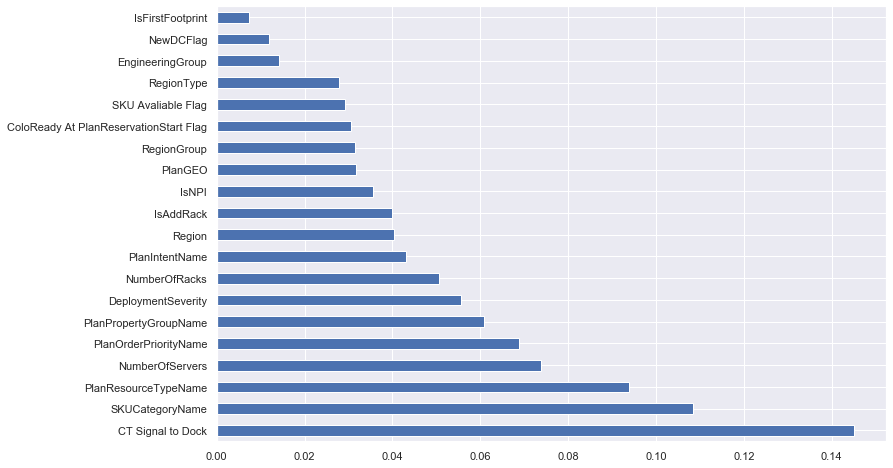

In [17]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [18]:
#Lets split our data into training and testing sets. random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [19]:
#lest import RFR
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor() #lets keep all the parmeters to default as of now

In [20]:
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
#Predictions 
pred=RFR.predict(x_test)

In [22]:
# Lets evaluate our results (compairing y_test with the pred)
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [23]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [24]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre) 

RMSE : 66.00561668045768
MAE: 40.64815887137773
r_square: 0.570620943740268


In [25]:
#Lets Check the Feaure Importance 
importances=RFR.feature_importances_

for feature in zip (x.columns, importances):
    print (feature)

('NewDCFlag', 0.009738966264680602)
('ColoReady At PlanReservationStart Flag', 0.01649903011299643)
('DeploymentSeverity', 0.018066714938261688)
('EngineeringGroup', 0.007315707602024355)
('PlanResourceTypeName', 0.16772833547717667)
('IsAddRack', 0.020570927118542977)
('IsFirstFootprint', 0.011718030621549495)
('IsNPI', 0.015091297472397257)
('PlanGEO', 0.038621387378085896)
('PlanIntentName', 0.02609665360174875)
('NumberOfRacks', 0.02989086969119977)
('NumberOfServers', 0.11591611266166418)
('PlanOrderPriorityName', 0.0699264145661918)
('PlanPropertyGroupName', 0.03825939933931898)
('Region', 0.0594064589378085)
('RegionGroup', 0.0138984530580656)
('RegionType', 0.01698131567100448)
('SKU Avaliable Flag', 0.008925227261572504)
('SKUCategoryName', 0.07632047103949618)
('CT Signal to Dock', 0.23902822718621392)


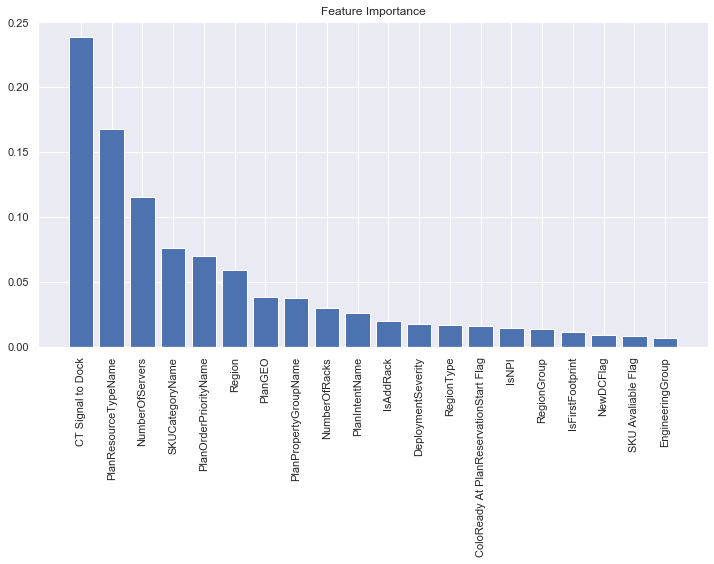

In [26]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [27]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor()
parameters = {
    'n_estimators': [100,200,300,400,500],
    'max_depth' : [2,3,4,5,6,7,8,None]
}

cv = GridSearchCV(rfr, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [28]:
cv.best_params_

{'max_depth': None, 'n_estimators': 300}

In [29]:
#GridSearch Predictions
pred=cv.predict(x_test)

In [30]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [31]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre) 

RMSE : 64.4404827137744
MAE: 39.69024939275829
r_square: 0.5907425054623077


# Gradient Boosting

In [102]:
# Initialize and fit regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [92]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='lad', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [93]:
#Predictions
pred=gbr.predict(x_test)

In [94]:
G_pred_all_feature=pd.DataFrame(pred)#For stack model

In [95]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [96]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 78.54250023804913
MAE: 43.11673861468859
r_square: 0.3920210888521449


In [38]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

rfr = GradientBoostingRegressor()
parameters = {
                'n_estimators': [100,200,300],
                'criterion' : ['mse','friedman_mse'],
                'max_depth' : [2,3,4,5,6,7,8,None],
                'loss' : ['ls', 'lad', 'huber']
}

cv = GridSearchCV(rfr, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  8.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [39]:
cv.best_params_

{'criterion': 'mse', 'loss': 'lad', 'max_depth': None, 'n_estimators': 300}

In [40]:
#GridSearch Predictions 
pred=cv.predict(x_test)

In [41]:
#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 67.85432966248753
MAE: 43.497751065591196
r_square: 0.5462316508747609


# AdaBoost

In [103]:
from sklearn.ensemble import AdaBoostRegressor
abr= AdaBoostRegressor()

In [98]:
abr.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='exponential',
                  n_estimators=200, random_state=None)

In [99]:
#Predictions
pred=abr.predict(x_test)

In [100]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [101]:
#Results
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 98.83031438083923
MAE: 84.23875551936379
r_square: 0.037369927400113356


In [47]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

adb1 = AdaBoostRegressor()
parameters = {
                'n_estimators': [100,200,300],
                'learning_rate' : [0.1,1],
                'loss' : ['linear', 'square', 'exponential']
               
}

cv = GridSearchCV(adb1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   14.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [48]:
cv.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 200}

# Neural Neats-MLP

In [49]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor()

In [50]:
mlp.fit(x_train,y_train)

C:\Users\Shrutee\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [51]:
#Predictions
pred=mlp.predict(x_test)

In [52]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [53]:
#Results
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 85.8586123369998
MAE: 58.45986466843363
r_square: 0.27348129307836855


In [54]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

mlp1 = MLPRegressor()
parameters = {
                'hidden_layer_sizes': [(10,), (50,), (100,)],
                'activation': ['relu', 'tanh', 'logistic'],
                'learning_rate': ['constant', 'invscaling', 'adaptive']
               
}

cv = GridSearchCV(mlp1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   28.4s finished
C:\Users\Shrutee\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=...uffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['rel

In [55]:
cv.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100,),
 'learning_rate': 'invscaling'}

# Catboost 

In [56]:
#lets define our predictors and outcome (Target)
#x1=df1.drop(["CT Signal to LIve","CT Signal to Dock"],axis=1)
#y1=df1["CT Signal to LIve"]

In [57]:
#Lets split our data into training and testing sets. random_state is the seed used by the random number generator. It can be any integer.
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=100)

In [58]:
from catboost import CatBoostRegressor
cr=CatBoostRegressor(iterations=200, loss_function='RMSE',
                              random_state = 2021, 
                              eval_metric="RMSE")

In [59]:
cr.fit(x_train, y_train,eval_set=(x_test, y_test))

Learning rate set to 0.121598
0:	learn: 99.8410134	test: 97.3575897	best: 97.3575897 (0)	total: 476ms	remaining: 1m 34s
1:	learn: 96.8258304	test: 94.8018270	best: 94.8018270 (1)	total: 481ms	remaining: 47.6s
2:	learn: 94.1591276	test: 92.4645876	best: 92.4645876 (2)	total: 485ms	remaining: 31.9s
3:	learn: 91.9742048	test: 90.6781748	best: 90.6781748 (3)	total: 489ms	remaining: 24s
4:	learn: 90.1300350	test: 89.0741077	best: 89.0741077 (4)	total: 494ms	remaining: 19.3s
5:	learn: 88.2400012	test: 87.3663500	best: 87.3663500 (5)	total: 498ms	remaining: 16.1s
6:	learn: 86.5566120	test: 86.2464665	best: 86.2464665 (6)	total: 501ms	remaining: 13.8s
7:	learn: 85.0945353	test: 85.1332653	best: 85.1332653 (7)	total: 504ms	remaining: 12.1s
8:	learn: 83.5268276	test: 84.1325647	best: 84.1325647 (8)	total: 506ms	remaining: 10.7s
9:	learn: 82.6746387	test: 83.6139193	best: 83.6139193 (9)	total: 509ms	remaining: 9.67s
10:	learn: 81.5409683	test: 82.9363071	best: 82.9363071 (10)	total: 511ms	remaini

108:	learn: 47.1637595	test: 63.3292096	best: 63.3292096 (108)	total: 783ms	remaining: 653ms
109:	learn: 46.9690067	test: 63.3216461	best: 63.3216461 (109)	total: 786ms	remaining: 643ms
110:	learn: 46.6761391	test: 63.2299529	best: 63.2299529 (110)	total: 789ms	remaining: 633ms
111:	learn: 46.6110466	test: 63.2729128	best: 63.2299529 (110)	total: 792ms	remaining: 623ms
112:	learn: 46.5209317	test: 63.2423505	best: 63.2299529 (110)	total: 795ms	remaining: 612ms
113:	learn: 46.2500355	test: 63.1375917	best: 63.1375917 (113)	total: 798ms	remaining: 602ms
114:	learn: 46.1343234	test: 63.1036645	best: 63.1036645 (114)	total: 801ms	remaining: 592ms
115:	learn: 45.9616263	test: 63.1088711	best: 63.1036645 (114)	total: 805ms	remaining: 583ms
116:	learn: 45.7950266	test: 63.1179479	best: 63.1036645 (114)	total: 808ms	remaining: 573ms
117:	learn: 45.6317528	test: 63.0910916	best: 63.0910916 (117)	total: 811ms	remaining: 564ms
118:	learn: 45.5049688	test: 63.0331558	best: 63.0331558 (118)	total: 

In [60]:
# Lets do predictions on out test data
pred=cr.predict(x_test)

In [61]:
C_pred_all_feature=pd.DataFrame(pred)#For Stack model

In [62]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [63]:
#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 60.927395184566386
MAE: 38.97208851157851
r_square: 0.6341489602391472


In [64]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

cat1 = CatBoostRegressor()
parameters = {
                'iterations': [100,200,300,400],
                'loss_function': ['MAE', 'RMSE'],
                
               
}

cv = GridSearchCV(cat1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   13.9s finished


Learning rate set to 0.094534
0:	learn: 101.4283133	total: 3.89ms	remaining: 1.16s
1:	learn: 99.5301059	total: 7.81ms	remaining: 1.16s
2:	learn: 96.8352859	total: 10.7ms	remaining: 1.06s
3:	learn: 95.1391335	total: 13.6ms	remaining: 1s
4:	learn: 93.1997020	total: 16.3ms	remaining: 962ms
5:	learn: 91.9490683	total: 19.3ms	remaining: 946ms
6:	learn: 90.7847926	total: 22.1ms	remaining: 926ms
7:	learn: 89.5585577	total: 24.4ms	remaining: 889ms
8:	learn: 88.4353513	total: 27.3ms	remaining: 884ms
9:	learn: 87.0731058	total: 30.2ms	remaining: 876ms
10:	learn: 85.8498982	total: 32.9ms	remaining: 865ms
11:	learn: 84.6222592	total: 35.8ms	remaining: 859ms
12:	learn: 83.5333143	total: 38.6ms	remaining: 853ms
13:	learn: 82.6014764	total: 41.5ms	remaining: 848ms
14:	learn: 81.8701756	total: 45.1ms	remaining: 857ms
15:	learn: 81.1574694	total: 47.6ms	remaining: 844ms
16:	learn: 80.2710392	total: 50.4ms	remaining: 839ms
17:	learn: 79.9198891	total: 53.4ms	remaining: 836ms
18:	learn: 79.4654841	total:

163:	learn: 45.3264555	total: 452ms	remaining: 375ms
164:	learn: 45.1362805	total: 455ms	remaining: 372ms
165:	learn: 45.0331846	total: 457ms	remaining: 369ms
166:	learn: 44.8821767	total: 460ms	remaining: 366ms
167:	learn: 44.8043709	total: 462ms	remaining: 363ms
168:	learn: 44.7315123	total: 464ms	remaining: 360ms
169:	learn: 44.5816172	total: 467ms	remaining: 357ms
170:	learn: 44.4322103	total: 469ms	remaining: 354ms
171:	learn: 44.3427645	total: 472ms	remaining: 351ms
172:	learn: 44.2061086	total: 474ms	remaining: 348ms
173:	learn: 44.1980627	total: 477ms	remaining: 345ms
174:	learn: 43.9944123	total: 479ms	remaining: 342ms
175:	learn: 43.9809788	total: 482ms	remaining: 340ms
176:	learn: 43.8557495	total: 484ms	remaining: 337ms
177:	learn: 43.6706659	total: 487ms	remaining: 334ms
178:	learn: 43.4908503	total: 489ms	remaining: 331ms
179:	learn: 43.3370200	total: 492ms	remaining: 328ms
180:	learn: 43.2455642	total: 494ms	remaining: 325ms
181:	learn: 43.2260134	total: 497ms	remaining:

GridSearchCV(cv=3, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x000000000C719080>,
             iid='deprecated', n_jobs=-1,
             param_grid={'iterations': [100, 200, 300, 400],
                         'loss_function': ['MAE', 'RMSE']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [65]:
cv.best_params_

{'iterations': 300, 'loss_function': 'RMSE'}

# KNN

In [66]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [67]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [68]:
pred=knn.predict(x_test)

In [69]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [70]:
#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 79.98602369017429
MAE: 52.641992882562285
r_square: 0.369467776687173


In [71]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

knn1 = KNeighborsRegressor()
parameters = {
                'n_neighbors': [5,7,10,12],
                'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
                
               
}

cv = GridSearchCV(knn1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  48 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 10, 12]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [72]:
cv.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 12}

# Stack Model 

Lest stack Two models 1. Gradient Boosting 2. CatBoosting 
And meta estimator- Random Forest 

This is a special method where we first segment the dataset as training and testing portions.Then we use the training set to train multiple regressors(base learners) and obtain their predictions made on the test set. Then we stack the predicted columns vertically which we consider as features while having the actual values of these samples in the last column as targets.Now we have created a new dataset which we give to another Regressor(meta learner) to identify patterns/relationships between predictions and actual values.

In [73]:
# Now Lets concat the 2 prediction datafreames and one Actual data frame
#actual=pd.DataFrame(y_test)

In [74]:
#actual.to_csv("True.csv",index=0,columns=actual.columns)

In [75]:
#G_pred_a.columns=["Prediction1"]
#C_pred.columns=["Prediction2"]

In [76]:
#sd=pd.read_csv("priction_join.csv")

In [77]:
#sd.info()

In [78]:
#Lets define X and Y
#x=sd.drop("CT Signal to LIve",axis=1)
#y=sd["CT Signal to LIve"]

In [79]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [80]:
#stacker= RandomForestRegressor(n_estimators=100,max_depth=5)

In [81]:
#stacker.fit(x_train,y_train)

In [82]:
#stcker_pred=stacker.predict(x_test)

#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, stcker_pred))
MAE = mean_absolute_error(y_test, stcker_pred)
r_squre= r2_score(y_test, stcker_pred)

#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
parameters = {
    'n_estimators': [100,200,300,400,500],
    'max_depth' : [2,3,4,5,6,7,8,None]
}

cv = GridSearchCV(rf, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

cv.best_params_